(norms-notebook)=
# Valutazioni normative e criteriali

I punteggi normativi sono utilizzati nelle valutazioni educative e psicologiche per confrontare le prestazioni di un individuo rispetto a un campione normativo rappresentativo della popolazione. Questi punteggi forniscono informazioni preziose sul modo in cui le prestazioni di un individuo si collocano rispetto a quelle degli altri nel gruppo di riferimento. Questo capitolo esplorerà diverse tipologie di punteggi normativi, tra cui i Punteggi Percentili, i Punteggi Standardizzati e Normalizzati, gli Stanini e gli Equivalenti alla Curva Normale. Ogni tipo di punteggio verrà illustrato con esempi pratici utilizzando R.

In [1]:
source("_common.R")
suppressPackageStartupMessages({
    library("lavaanPlot")
    library("lavaanExtra")
})

## Norme e punteggi standardizzati

Le norme rappresentano un insieme di dati di riferimento che consentono di stabilire come si posizionano i punteggi ottenuti da un individuo rispetto a un gruppo di confronto rappresentativo della popolazione di interesse. Questi dati di riferimento sono solitamente ottenuti da un campione rappresentativo della popolazione, e possono essere espressi come valori medi, deviazioni standard o percentili. Le norme sono utilizzate per interpretare i punteggi degli individui e capire come si collocano rispetto alla distribuzione del gruppo di confronto.

I punteggi standardizzati sono una trasformazione dei punteggi originali di un individuo in modo da esprimere la loro posizione in termini di deviazioni standard rispetto alla media del gruppo di riferimento. Questa trasformazione è utile per rendere i punteggi confrontabili tra diverse misure o tra diverse popolazioni. I punteggi standardizzati possono essere espressi in unità di z-score o in percentili, fornendo una base comune per la comparazione e l'interpretazione dei risultati.

Per chiarire questi concetti, esaminiamo i dati della Tabella 2.1 di {cite:t}`bandalos2018measurement`.

In [2]:
raw_score <- c(
    26, 25, 33, 31, 26, 34, 29, 36, 25, 29, 28, 32, 25,
    30, 27, 31, 30, 30, 35, 30, 27, 26, 34, 32, 26, 34,
    30, 28, 28, 31, 30, 27, 26, 29, 29, 33, 27, 35, 26,
    27, 28, 29, 28, 27, 34, 36, 26, 26, 34, 30, 34, 27
)

### Distribuzione di frequenze

In [3]:
freq <- table(raw_score) # frequency
cumfreq <- cumsum(freq) # cumulative frequency
perc <- prop.table(freq) * 100 # percentage
cumperc <- cumsum(perc) # cumulative percentage
pr <- (cumperc - 0.5 * perc) # percentile rank
cbind(freq, cumfreq, perc, cumperc, pr)

,freq,cumfreq,perc,cumperc,pr
25,3,3,5.769231,5.769231,2.884615
26,8,11,15.384615,21.153846,13.461538
27,7,18,13.461538,34.615385,27.884615
28,5,23,9.615385,44.230769,39.423077
29,5,28,9.615385,53.846154,49.038462
30,7,35,13.461538,67.307692,60.576923
31,3,38,5.769231,73.076923,70.192308
32,2,40,3.846154,76.923077,75.000000
33,2,42,3.846154,80.769231,78.846154
34,6,48,11.538462,92.307692,86.538462


### Punteggi Percentili

I punteggi percentili indicano la percentuale di persone nel campione normativo che ha ottenuto un punteggio uguale o inferiore a quello di un individuo specifico. Ad esempio, calcoliamo il quantile di ordine 0.74.

In [4]:
# P74
quantile(raw_score, .74)

74% 
31.74

In [5]:
# Use a different type (see https://en.wikipedia.org/wiki/Quantile#Estimating_quantiles_from_a_sample)
quantile(raw_score, .74, type = 6)

74% 
 32

### Punteggi Standardizzati 

I punteggi standardizzati trasformano i punteggi grezzi in una scala comune con una determinata media e una determinata deviazione standard. 

#### Punteggi z

I punteggi z hanno media 0 e deviazione standard 1.

In [6]:
z_score <- (raw_score - mean(raw_score)) / sd(raw_score)
c(mean = mean(z_score), sd = sd(z_score))

mean            sd 
-4.937123e-16  1.000000e+00

#### Punteggi T

I punteggi z hanno media 50 e deviazione standard 10.

In [ ]:
T_score <- z_score * 10 + 50
c(mean = mean(T_score), sd = sd(T_score))

#### Punteggi stanini

Gli Stanini sono una scala di punteggio standardizzata composta da nove intervalli, ciascuno definito da un cut-off di 10 punti. Questo tipo di punteggio standardizzato è utilizzato per facilitare la comprensione della posizione di ciascuna osservazione all'interno della scala. Ogni intervallo corrisponde a un punteggio stanino specifico, consentendo una suddivisione chiara e intuitiva dei dati. Ad esempio, uno stanine di 1 rappresenta i punteggi più bassi, mentre uno stanine di 9 rappresenta i punteggi più alti. Questo sistema semplifica l'interpretazione dei punteggi e permette di valutare facilmente il livello di performance relativo di ogni individuo rispetto alla popolazione di riferimento.

Per calcolare i punteggi stanini è possibile seguire questi passaggi:

1. Calcolare la media e la deviazione standard dei dati.
2. Utilizzare la formula dei punteggi stanini per ogni dato nella lista:
   $\text{Stanine} = \left( \frac{\text{Raw Score} - \text{Mean}}{\text{Standard Deviation}} \right) \times 2 + 5$.
3. Arrotondare i punteggi stanini al numero intero più vicino.

In [ ]:
mean_score <- mean(raw_score)
sd_score <- sd(raw_score)

stanine_scores <- round((raw_score - mean_score) / sd_score * 2 + 5)
print(stanine_scores)

È importante ricordare che la trasformazione in punti z non cambia la forma della distribuzione.

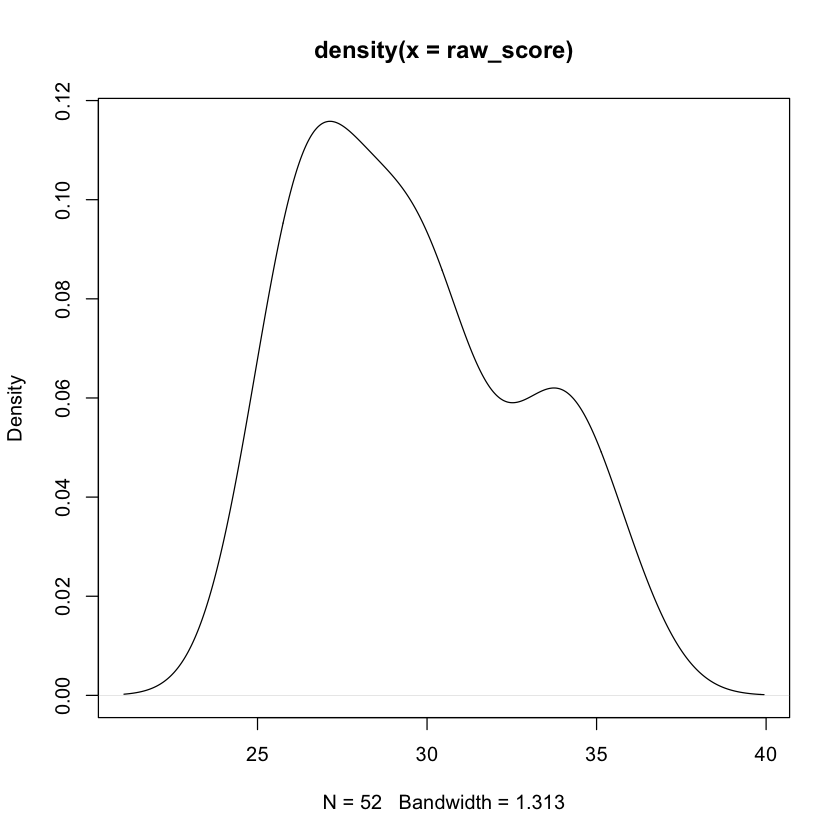

In [9]:
plot(density(raw_score))

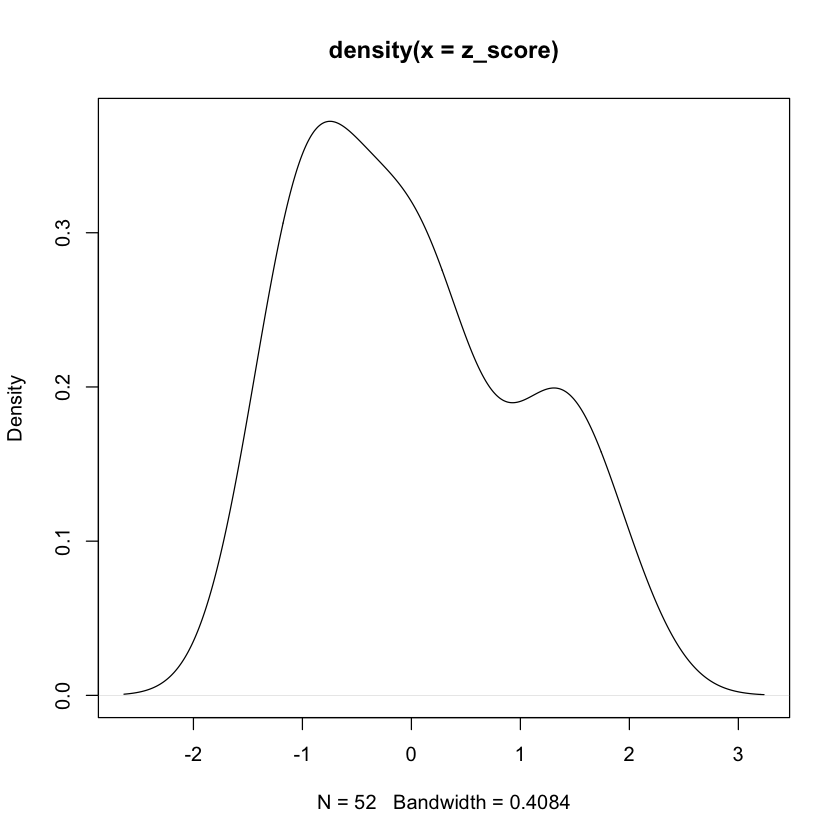

In [10]:
plot(density(z_score))

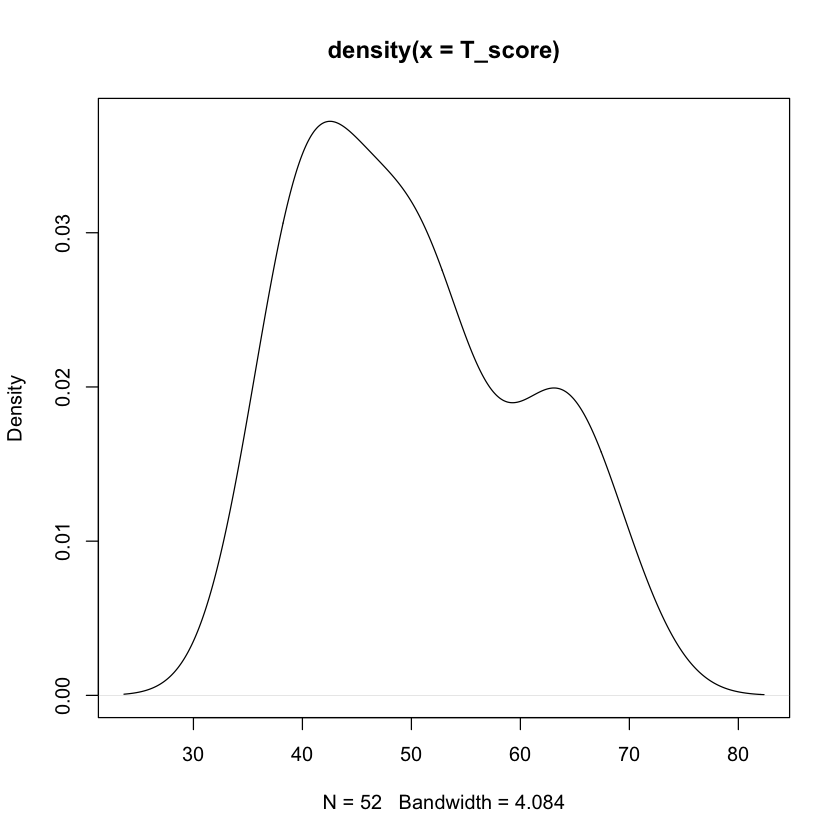

In [11]:
plot(density(T_score))

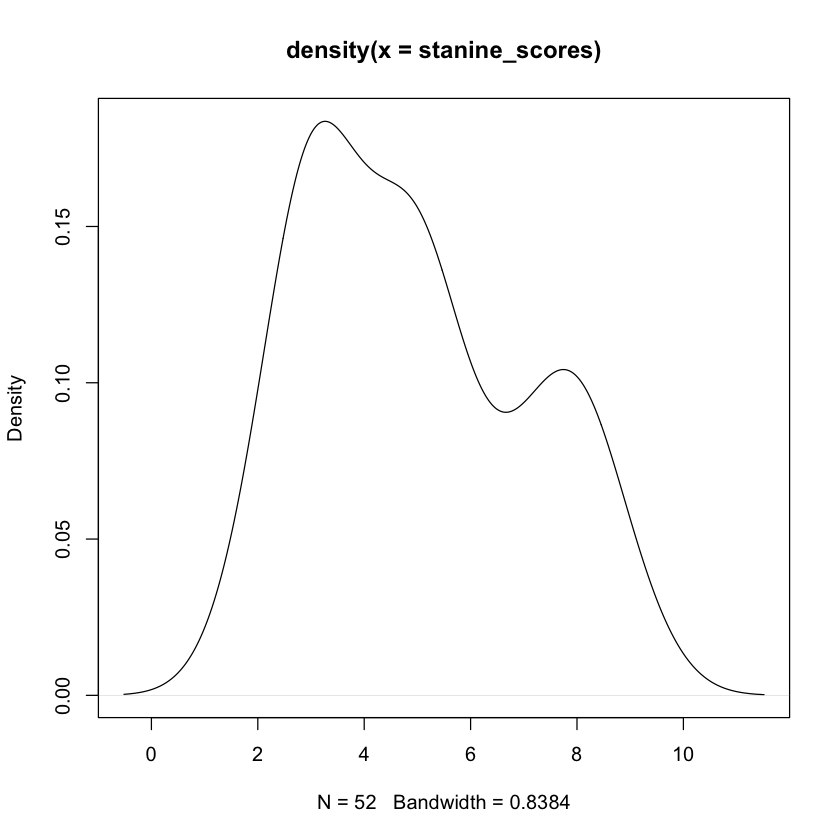

In [13]:
plot(density(stanine_scores))

### Equivalenti alla curva normale

I punteggi equivalenti alla curva normale (*Normal Curve Equivalents*, NCE) sono punteggi trasformati in modo da avere una distribuzione approssimativamente simile a una curva normale standard. Questi punteggi permettono di confrontare le prestazioni su diverse misure in modo più diretto.

Per i dati dell'esempio abbiamo:

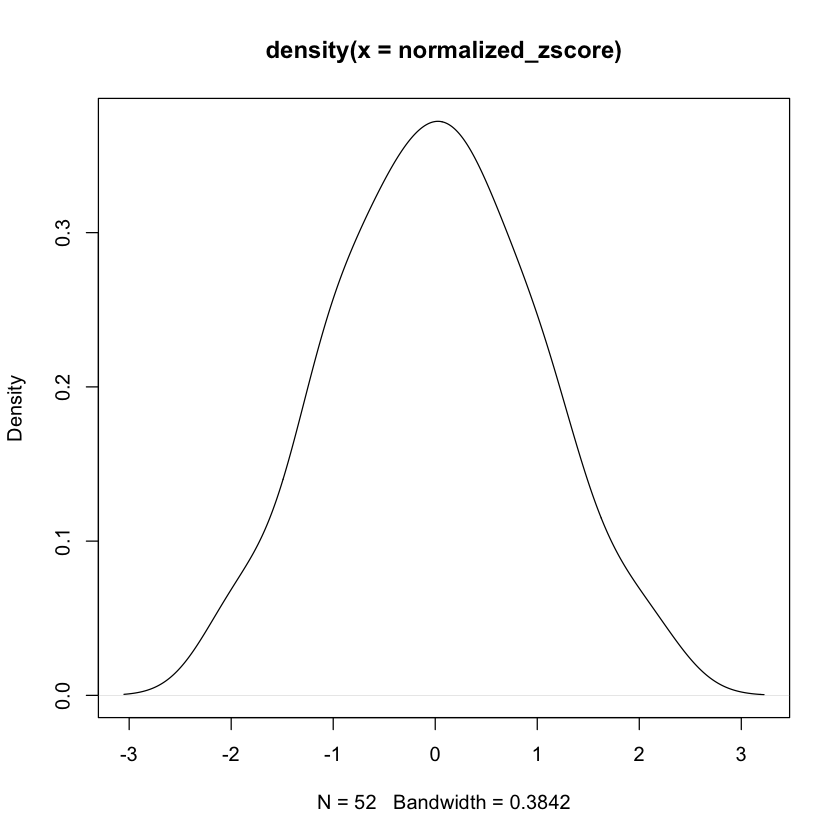

In [15]:
# Using normal quantile
qnorm_pr <- qnorm(pr / 100)
# Convert raw scores
normalized_zscore <- as.vector(qnorm_pr[as.character(raw_score)])
plot(density(normalized_zscore)) # the shape will be closer to normal

Si osservi che i dati NCE presentano una distribuzione più simile a una curva a forma campanulare rispetto ai dati grezzi.

## Valutazioni criteriali

Il testing basato sul riferimento al criterio è un approccio valutativo che si differenzia dai metodi discusse precedentemente. In questo caso, si confrontano i punteggi di un individuo con criteri specifici stabiliti in anticipo, invece di confrontarli con quelli di un gruppo di riferimento come nei test basati sul riferimento normativo. Questo approccio sta guadagnando interesse nei contesti educativi poiché gli educatori sono sempre più interessati a valutare accuratamente le competenze degli studenti indipendentemente dal confronto con i loro compagni di classe.

## Conclusione

I punteggi grezzi possono essere trasformati per renderli più interpretabili. Esistono due approcci principali per attribuire significato ai punteggi di un test: il riferimento normativo e il riferimento al criterio.

Nel sistema di riferimento normativo, il punteggio di un individuo viene confrontato con il punteggio medio degli altri individui che hanno svolto lo stesso test, noti come gruppo normativo. Ci sono vari tipi di punteggi normati di riferimento, ognuno con vantaggi e limitazioni.

I punteggi percentile sono facilmente comprensibili, ma rappresentano una scala ordinale, limitando il loro utilizzo in operazioni matematiche. D'altra parte, i punteggi standardizzati, come gli z-score e i T-scores, sono facilmente calcolabili e rappresentano una scala di misura a intervallo. Questi punteggi preservano la forma distributiva dei punteggi grezzi da cui sono stati calcolati. Se si desidera ottenere una distribuzione normale dei punteggi, possono essere utilizzati punteggi normalizzati come gli stanini e gli NCE (Normal Curve Equivalents). Queste trasformazioni rendono i punteggi più simili a una curva normale standard, facilitando l'interpretazione e l'analisi dei dati.